In [1]:
import pandas as pd #data manipulation and analysis
import numpy as np #numerical computing
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

In [2]:
import os #operating system
from sklearn.preprocessing import StandardScaler,  MinMaxScaler #Standardization
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering#K-means clustering
from sklearn.decomposition import PCA #Principal component analysis 
from sklearn.manifold import TSNE #t-distributed stochastic neighbor embedding
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score,davies_bouldin_score
import scipy.cluster.hierarchy as sch #dendrogram

In [3]:
import warnings #to ignore warnings
warnings.filterwarnings('ignore') #ignore warnings

In [4]:
sns.set(style="whitegrid") #set seaborn style
plt.rcParams['figure.figsize'] = (10, 6) #set figure size
pd.set_option('display.max_columns', None) #display all columns

In [5]:
df = pd.read_csv(r"D:\Studys\GUVI\GUVI Project\Amazon Music Clustering\Amazon Music Clustering_documentation\single_genre_artists.csv")

In [6]:
df

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,-15.375,1,0.0670,0.989,0.000000,0.1280,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,-15.514,1,0.0592,0.995,0.000000,0.4180,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,-12.393,0,0.1650,0.991,0.000000,0.2190,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,-13.806,1,0.1380,0.991,0.000000,0.3730,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,-6.356,1,0.0408,0.116,0.000000,0.1650,0.640,166.107,4,16057.0,['alt z'],Jordan Clarke,56
95833,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,-3.639,1,0.0314,0.143,0.000000,0.0989,0.297,130.066,4,929.0,['chinese viral pop'],芝麻,36
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,-28.573,1,0.1180,0.996,0.973000,0.1080,0.890,68.619,4,23.0,['instrumental lullaby'],Laureen Conrad,52
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.386,63.696,3,91.0,['instrumental lullaby'],Gregory Oberle,55


In [7]:
df.head(3)

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,-13.757,1,0.0512,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,-15.375,1,0.0670,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,-15.514,1,0.0592,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22


In [8]:
df.tail(3)

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,-28.573,1,0.1180,0.996,0.973,0.1080,0.890,68.619,4,23.0,['instrumental lullaby'],Laureen Conrad,52
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961,0.1110,0.386,63.696,3,91.0,['instrumental lullaby'],Gregory Oberle,55
95836,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,1QLBXKM5GCpyQQSVMNZqrZ,2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000,0.0648,0.211,131.896,4,896.0,['chinese viral pop'],阿YueYue,38


In [9]:
print(df.shape)           # How many rows & columns?
print(df.info())          # Data types, missing values?

(95837, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float

In [10]:
print(df.isnull().sum())  # Missing values?

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64


In [11]:
print(df.duplicated().sum())  # Duplicates?
print(df.describe())      # Summary statistics for numerical columns

0
       popularity_songs   duration_ms      explicit  danceability  \
count      95837.000000  9.583700e+04  95837.000000  95837.000000   
mean          26.066394  2.087320e+05      0.029644      0.586853   
std           16.254133  1.177526e+05      0.169604      0.155422   
min            0.000000  6.373000e+03      0.000000      0.000000   
25%           13.000000  1.573330e+05      0.000000      0.488000   
50%           26.000000  2.040000e+05      0.000000      0.605000   
75%           37.000000  2.502670e+05      0.000000      0.700000   
max           98.000000  4.800118e+06      1.000000      0.991000   

             energy           key      loudness          mode   speechiness  \
count  95837.000000  95837.000000  95837.000000  95837.000000  95837.000000   
mean       0.541083      5.196782    -10.157862      0.648069      0.168832   
std        0.236304      3.534923      4.748798      0.477575      0.275417   
min        0.000020      0.000000    -50.174000      0.00000

In [12]:
print("shape = ",df["id_songs"].shape)
print("\ninfo = ",df["id_songs"].info())
print("\nisnull = ",df["id_songs"].isnull().sum())
print("\ndescribe = ", df["id_songs"].describe())
print("\nnunique =",df["id_songs"].nunique())
print("\nunique =",df["id_songs"].unique())
print("\nvalue_counts =",df['id_songs'].value_counts())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: id_songs
Non-Null Count  Dtype 
--------------  ----- 
95837 non-null  object
dtypes: object(1)
memory usage: 748.9+ KB

info =  None

isnull =  0

describe =  count                      95837
unique                     95837
top       0IA0Hju8CAgYfV1hwhidBH
freq                           1
Name: id_songs, dtype: object

nunique = 95837

unique = ['0IA0Hju8CAgYfV1hwhidBH' '1b8HZQCqcqwbzlA1jRTp6E'
 '5d5gQxHwYovxR5pqETOIAa' ... '1dKxf4Ht2SsKLyXfSDJAgy'
 '0SjsIzJkZfDU7wlcdklEFR' '5rgu12WBIHQtvej2MdHSH0']

value_counts = id_songs
0IA0Hju8CAgYfV1hwhidBH    1
1b8HZQCqcqwbzlA1jRTp6E    1
5d5gQxHwYovxR5pqETOIAa    1
1EO65UEEPfy7CR0NK2sDxy    1
6a58gXSgqbIsXUhVZ6ZJqe    1
                         ..
44r4zta6P9flkhKaVnbsvG    1
0MmaEacabpK8Yp3Mdeo5uY    1
1dKxf4Ht2SsKLyXfSDJAgy    1
0SjsIzJkZfDU7wlcdklEFR    1
5rgu12WBIHQtvej2MdHSH0    1
Name: count, Length: 95837, dtype: int64


In [13]:
print("shape = ",df["name_song"].shape)
print("\ninfo = ",df["name_song"].info())
print("\nisnull = ",df["name_song"].isnull().sum())
print("\ndescribe = ", df["name_song"].describe())
print("\nnunique =",df["name_song"].nunique())
print("\nunique =",df["name_song"].unique())
print("\nvalue_counts =",df['name_song'].value_counts())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: name_song
Non-Null Count  Dtype 
--------------  ----- 
95837 non-null  object
dtypes: object(1)
memory usage: 748.9+ KB

info =  None

isnull =  0

describe =  count                    95837
unique                   85427
top       Bibi Blocksberg Lied
freq                        33
Name: name_song, dtype: object

nunique = 85427

unique = ['La Java' 'En Douce' "J'en Ai Marre" ... 'The Cutest Puppy'
 "John Brown's Song" '云与海']

value_counts = name_song
Bibi Blocksberg Lied                                                                                   33
Intro                                                                                                  20
Benjamin Blümchen Lied                                                                                 19
Time                                                                                                   14
Lonely       

In [14]:
print("shape = ",df["id_artists"].shape)
print("\ninfo = ",df["id_artists"].info())
print("\nisnull = ",df["id_artists"].isnull().sum())
print("\ndescribe = ", df["id_artists"].describe())
print("\nnunique =",df["id_artists"].nunique())
print("\nunique =",df["id_artists"].unique())
print("\nvalue_counts =",df['id_artists'].value_counts())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: id_artists
Non-Null Count  Dtype 
--------------  ----- 
95837 non-null  object
dtypes: object(1)
memory usage: 748.9+ KB

info =  None

isnull =  0

describe =  count                      95837
unique                     18009
top       3meJIgRw7YleJrmbpbJK6S
freq                        3856
Name: id_artists, dtype: object

nunique = 18009

unique = ['4AxgXfD7ISvJSTObqm4aIE' '7DIlOK9L8d0IQ7Xk8aJxDW'
 '28pbIiOohRRZjqpAM9iqYM' ... '7vgGpuiXdNlCmc994PlMlz'
 '4MxqhahGRT4BPz1PilXGeu' '1QLBXKM5GCpyQQSVMNZqrZ']

value_counts = id_artists
3meJIgRw7YleJrmbpbJK6S    3856
0i38tQX5j4gZ0KS3eCMoIl    2006
1l6d0RIxTL3JytlLGvWzYe    1503
3t2iKODSDyzoDJw7AsD99u    1472
1hD52edfn6aNsK3fb5c2OT     812
                          ... 
2gaWHbmYNQ9nbKgfmkOLP8       1
2JzTVgQ5vs7k1gGXbC5DWG       1
4AOgY5YwQw4d5pgEX3f56A       1
6gAvgPl08HUbzcqw8hquEf       1
6GCii6lkUhkzTrznRyCuVh       1
Name: count, Len

In [15]:
print("shape = ",df["genres"].shape)
print("\ninfo = ",df["genres"].info())
print("\nisnull = ",df["genres"].isnull().sum())
print("\ndescribe = ", df["genres"].describe())
print("\nnunique =",df["genres"].nunique())
print("\nunique =",df["genres"].unique())
print("\nvalue_counts =",df['genres'].value_counts())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
95837 non-null  object
dtypes: object(1)
memory usage: 748.9+ KB

info =  None

isnull =  0

describe =  count             95837
unique             3153
top       ['hoerspiel']
freq               8027
Name: genres, dtype: object

nunique = 3153

unique = ["['vintage chanson']" "['new orleans jazz']" "['harlem renaissance']" ...
 "['chinese classical performance']" "['chinese new year']"
 "['singaporean indie']"]

value_counts = genres
['hoerspiel']                        8027
['kleine hoerspiel']                 2081
[]                                   1876
['classic israeli pop']              1180
['vintage taiwan pop']               1097
                                     ... 
['italian mezzo-soprano']               1
['deep discofox']                       1
['pinoy praise']                        1
['lithuanian metal']     

In [16]:
print("shape = ",df["name_artists"].shape)
print("\ninfo = ",df["name_artists"].info())
print("\nisnull = ",df["name_artists"].isnull().sum())
print("\ndescribe = ", df["name_artists"].describe())
print("\nnunique =",df["name_artists"].nunique())
print("\nunique =",df["name_artists"].unique())
print("\nvalue_counts =",df['name_artists'].value_counts())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: name_artists
Non-Null Count  Dtype 
--------------  ----- 
95837 non-null  object
dtypes: object(1)
memory usage: 748.9+ KB

info =  None

isnull =  0

describe =  count            95837
unique           17662
top       Die drei ???
freq              3856
Name: name_artists, dtype: object

nunique = 17662

unique = ['Mistinguett' 'Félix Mayol' 'Louis Lynel' ... 'Laureen Conrad'
 'Gregory Oberle' '阿YueYue']

value_counts = name_artists
Die drei ???         3856
TKKG Retro-Archiv    2006
Benjamin Blümchen    1503
Bibi Blocksberg      1472
Fünf Freunde          812
                     ... 
甄秀珍                     1
Vivi Sumanti            1
The Tempters            1
Pat Bringer             1
Batucada Band           1
Name: count, Length: 17662, dtype: int64


In [17]:
print("shape = ",df["popularity_songs"].shape)
print("\ninfo = ",df["popularity_songs"].info())
print("\nisnull = ",df["popularity_songs"].isnull().sum())
print("\ndescribe = ", df["popularity_songs"].describe())
print("\nnunique =",df["popularity_songs"].nunique())
print("\nskew = ",df['popularity_songs'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: popularity_songs
Non-Null Count  Dtype
--------------  -----
95837 non-null  int64
dtypes: int64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    95837.000000
mean        26.066394
std         16.254133
min          0.000000
25%         13.000000
50%         26.000000
75%         37.000000
max         98.000000
Name: popularity_songs, dtype: float64

nunique = 94

skew =  0.26968048030592345


In [18]:
print("shape = ",df["duration_ms"].shape)
print("\ninfo = ",df["duration_ms"].info())
print("\nisnull = ",df["duration_ms"].isnull().sum())
print("\ndescribe = ", df["duration_ms"].describe())
print("\nnunique =",df["duration_ms"].nunique())
print("\nskew = ",df['duration_ms'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: duration_ms
Non-Null Count  Dtype
--------------  -----
95837 non-null  int64
dtypes: int64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    9.583700e+04
mean     2.087320e+05
std      1.177526e+05
min      6.373000e+03
25%      1.573330e+05
50%      2.040000e+05
75%      2.502670e+05
max      4.800118e+06
Name: duration_ms, dtype: float64

nunique = 44685

skew =  10.035800691260967


In [19]:
print("shape = ",df["explicit"].shape)
print("\ninfo = ",df["explicit"].info())
print("\nisnull = ",df["explicit"].isnull().sum())
print("\ndescribe = ", df["explicit"].describe())
print("\nnunique =",df["explicit"].nunique())
print("\nskew = ",df['explicit'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: explicit
Non-Null Count  Dtype
--------------  -----
95837 non-null  int64
dtypes: int64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    95837.000000
mean         0.029644
std          0.169604
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: explicit, dtype: float64

nunique = 2

skew =  5.5466257551320926


In [20]:
print("shape = ",df["danceability"].shape)
print("\ninfo = ",df["danceability"].info())
print("\nisnull = ",df["danceability"].isnull().sum())
print("\ndescribe = ", df["danceability"].describe())
print("\nnunique =",df["danceability"].nunique())
print("\nskew = ",df['danceability'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: danceability
Non-Null Count  Dtype  
--------------  -----  
95837 non-null  float64
dtypes: float64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    95837.000000
mean         0.586853
std          0.155422
min          0.000000
25%          0.488000
50%          0.605000
75%          0.700000
max          0.991000
Name: danceability, dtype: float64

nunique = 996

skew =  -0.47679456437638584


In [21]:
print("shape = ",df["energy"].shape)
print("\ninfo = ",df["energy"].info())
print("\nisnull = ",df["energy"].isnull().sum())
print("\ndescribe = ", df["energy"].describe())
print("\nnunique =",df["energy"].nunique())
print("\nskew = ",df['energy'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: energy
Non-Null Count  Dtype  
--------------  -----  
95837 non-null  float64
dtypes: float64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    95837.000000
mean         0.541083
std          0.236304
min          0.000020
25%          0.365000
50%          0.542000
75%          0.727000
max          1.000000
Name: energy, dtype: float64

nunique = 1928

skew =  -0.10865690791203501


In [22]:
print("shape = ",df["key"].shape)
print("\ninfo = ",df["key"].info())
print("\nisnull = ",df["key"].isnull().sum())
print("\ndescribe = ", df["key"].describe())
print("\nnunique =",df["key"].nunique())
print("\nskew = ",df['key'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: key
Non-Null Count  Dtype
--------------  -----
95837 non-null  int64
dtypes: int64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    95837.000000
mean         5.196782
std          3.534923
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: key, dtype: float64

nunique = 12

skew =  0.009813608238040651


In [23]:
print("shape = ",df["loudness"].shape)
print("\ninfo = ",df["loudness"].info())
print("\nisnull = ",df["loudness"].isnull().sum())
print("\ndescribe = ", df["loudness"].describe())
print("\nnunique =",df["loudness"].nunique())
print("\nskew = ",df['loudness'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: loudness
Non-Null Count  Dtype  
--------------  -----  
95837 non-null  float64
dtypes: float64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    95837.000000
mean       -10.157862
std          4.748798
min        -50.174000
25%        -12.723000
50%         -9.397000
75%         -6.692000
max          5.376000
Name: loudness, dtype: float64

nunique = 19919

skew =  -1.11924900651215


In [24]:
print("shape = ",df["mode"].shape)
print("\ninfo = ",df["mode"].info())
print("\nisnull = ",df["mode"].isnull().sum())
print("\ndescribe = ", df["mode"].describe())
print("\nnunique =",df["mode"].nunique())
print("\nskew = ",df['mode'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: mode
Non-Null Count  Dtype
--------------  -----
95837 non-null  int64
dtypes: int64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    95837.000000
mean         0.648069
std          0.477575
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: mode, dtype: float64

nunique = 2

skew =  -0.6201002809909306


In [25]:
print("shape = ",df["speechiness"].shape)
print("\ninfo = ",df["speechiness"].info())
print("\nisnull = ",df["speechiness"].isnull().sum())
print("\ndescribe = ", df["speechiness"].describe())
print("\nnunique =",df["speechiness"].nunique())
print("\nskew = ",df['speechiness'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: speechiness
Non-Null Count  Dtype  
--------------  -----  
95837 non-null  float64
dtypes: float64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    95837.000000
mean         0.168832
std          0.275417
min          0.000000
25%          0.034100
50%          0.046200
75%          0.103000
max          0.968000
Name: speechiness, dtype: float64

nunique = 1648

skew =  2.128985407523073


In [26]:
print("shape = ",df["instrumentalness"].shape)
print("\ninfo = ",df["instrumentalness"].info())
print("\nisnull = ",df["instrumentalness"].isnull().sum())
print("\ndescribe = ", df["instrumentalness"].describe())
print("\nnunique =",df["instrumentalness"].nunique())
print("\nskew = ",df['instrumentalness'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: instrumentalness
Non-Null Count  Dtype  
--------------  -----  
95837 non-null  float64
dtypes: float64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    95837.000000
mean         0.082145
std          0.232440
min          0.000000
25%          0.000000
50%          0.000004
75%          0.001300
max          1.000000
Name: instrumentalness, dtype: float64

nunique = 5356

skew =  2.8632434339817943


In [27]:
print("shape = ",df["liveness"].shape)
print("\ninfo = ",df["liveness"].info())
print("\nisnull = ",df["liveness"].isnull().sum())
print("\ndescribe = ", df["liveness"].describe())
print("\nnunique =",df["liveness"].nunique())
print("\nskew = ",df['liveness'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: liveness
Non-Null Count  Dtype  
--------------  -----  
95837 non-null  float64
dtypes: float64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    95837.000000
mean         0.224916
std          0.185829
min          0.000000
25%          0.100000
50%          0.149000
75%          0.302000
max          0.997000
Name: liveness, dtype: float64

nunique = 1713

skew =  1.7686670691827164


In [28]:
print("shape = ",df["valence"].shape)
print("\ninfo = ",df["valence"].info())
print("\nisnull = ",df["valence"].isnull().sum())
print("\ndescribe = ", df["valence"].describe())
print("\nnunique =",df["valence"].nunique())
print("\nskew = ",df['valence'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: valence
Non-Null Count  Dtype  
--------------  -----  
95837 non-null  float64
dtypes: float64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    95837.000000
mean         0.574281
std          0.248126
min          0.000000
25%          0.378000
50%          0.589000
75%          0.780000
max          1.000000
Name: valence, dtype: float64

nunique = 1595

skew =  -0.2083432440586461


In [29]:
print("shape = ",df["tempo"].shape)
print("\ninfo = ",df["tempo"].info())
print("\nisnull = ",df["tempo"].isnull().sum())
print("\ndescribe = ", df["tempo"].describe())
print("\nnunique =",df["tempo"].nunique())
print("\nskew = ",df['tempo'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: tempo
Non-Null Count  Dtype  
--------------  -----  
95837 non-null  float64
dtypes: float64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    95837.000000
mean       117.539870
std         30.190399
min          0.000000
25%         94.829000
50%        116.595000
75%        135.975000
max        239.906000
Name: tempo, dtype: float64

nunique = 58312

skew =  0.35362644712499813


In [30]:
print("shape = ",df["time_signature"].shape)
print("\ninfo = ",df["time_signature"].info())
print("\nisnull = ",df["time_signature"].isnull().sum())
print("\ndescribe = ", df["time_signature"].describe())
print("\nnunique =",df["time_signature"].nunique())
print("\nskew = ",df['time_signature'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: time_signature
Non-Null Count  Dtype
--------------  -----
95837 non-null  int64
dtypes: int64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    95837.000000
mean         3.851362
std          0.544406
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: time_signature, dtype: float64

nunique = 5

skew =  -2.8530883074930924


In [31]:
print("shape = ",df["followers"].shape)
print("\ninfo = ",df["followers"].info())
print("\nisnull = ",df["followers"].isnull().sum())
print("\ndescribe = ", df["followers"].describe())
print("\nnunique =",df["followers"].nunique())
print("\nskew = ",df['followers'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: followers
Non-Null Count  Dtype  
--------------  -----  
95837 non-null  float64
dtypes: float64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    9.583700e+04
mean     1.979919e+05
std      7.807520e+05
min      0.000000e+00
25%      2.563000e+03
50%      1.595600e+04
75%      8.495100e+04
max      2.802643e+07
Name: followers, dtype: float64

nunique = 11585

skew =  15.785258831876051


In [32]:
print("shape = ",df["popularity_artists"].shape)
print("\ninfo = ",df["popularity_artists"].info())
print("\nisnull = ",df["popularity_artists"].isnull().sum())
print("\ndescribe = ", df["popularity_artists"].describe())
print("\nnunique =",df["popularity_artists"].nunique())
print("\nskew = ",df['popularity_artists'].skew())

shape =  (95837,)
<class 'pandas.core.series.Series'>
RangeIndex: 95837 entries, 0 to 95836
Series name: popularity_artists
Non-Null Count  Dtype
--------------  -----
95837 non-null  int64
dtypes: int64(1)
memory usage: 748.9 KB

info =  None

isnull =  0

describe =  count    95837.000000
mean        42.819329
std         20.897833
min          0.000000
25%         28.000000
50%         40.000000
75%         56.000000
max         95.000000
Name: popularity_artists, dtype: float64

nunique = 93

skew =  0.3881503440340816


### Data Cleaning & Exploration

In [33]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)
df.shape # view shape 

(95837, 23)

In [34]:
# Numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Categorical / non-numeric columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric:", numeric_cols) # view numeric columns
print("Categorical:", categorical_cols) # view categorical columns

Numeric: ['popularity_songs', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'popularity_artists']
Categorical: ['id_songs', 'name_song', 'id_artists', 'release_date', 'genres', 'name_artists']


### Convert numeric columns:

In [35]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# With errors='coerce', Pandas will replace it with NaN (missing value)

### Feature Selection

In [36]:
df_clean = df.drop(columns=['name_song', 'id_artists', 'name_artists', 'id_songs', 'release_date'], errors='ignore')

cluster_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

X = df[cluster_features].copy() # create a copy of the selected features

### Normalize the Data

In [37]:
scaler = StandardScaler() # Initialize the scaler
X_scaled = scaler.fit_transform(X) # fit and transform the data

X_scaled_df = pd.DataFrame(X_scaled, columns=cluster_features) # create a DataFrame for scaled data

###  Determine Optimal Number of Clusters

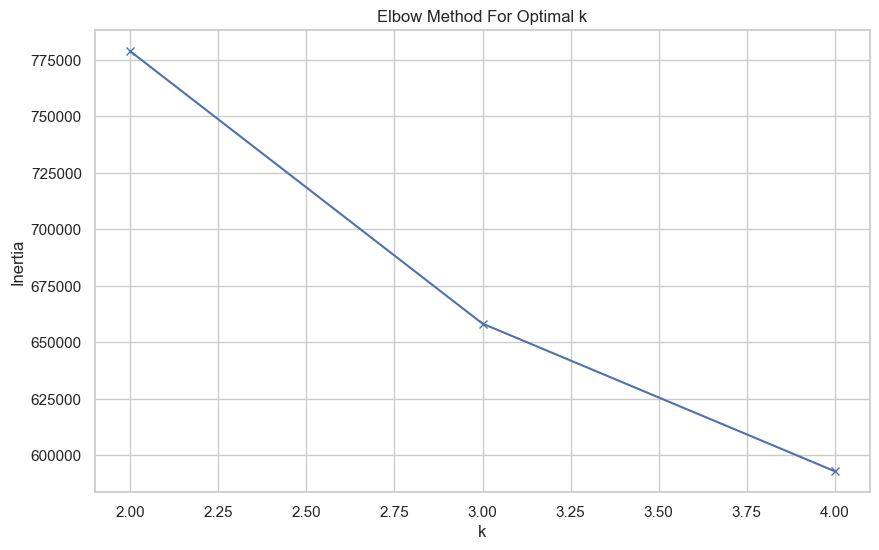

In [38]:
inertia = []
K = range(2, 5)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()


k=2, Silhouette Score: 0.2032
k=3, Silhouette Score: 0.2423
k=4, Silhouette Score: 0.2310


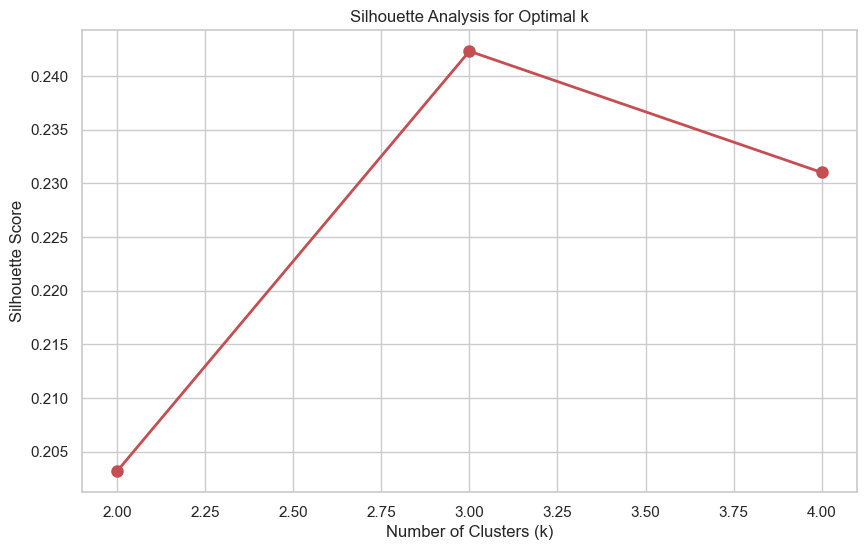

In [39]:
sil_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_avg = silhouette_score(X_scaled, labels)
    sil_scores.append(sil_avg)
    print(f"k={k}, Silhouette Score: {sil_avg:.4f}")

plt.plot(K, sil_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()

### Run KMeans again with the chosen k:

In [40]:
k = 3  # or 4
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)  # scaled_features = after StandardScaler 

# Add to original data
df['cluster'] = cluster_labels

### Cluster Evaluation

In [41]:
# Compute metrics
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: 0.2424


| Metric            | Good / Strong                                                   | Average / Okay | Poor / Weak |
| ----------------- | --------------------------------------------------------------- | -------------- | ----------- |
| **Silhouette**    | > 0.5                                                           | 0.25 – 0.5     | < 0.25      |



### Interpret Clusters (Profile by Feature Means)

In [42]:
# Compute mean feature values per cluster
cluster_profiles = df.groupby('cluster')[cluster_features].mean()
print("\nCluster Profiles (Mean Feature Values):\n")
print(cluster_profiles.round(3))


Cluster Profiles (Mean Feature Values):

         danceability  energy  loudness  speechiness  acousticness  \
cluster                                                              
0               0.486   0.311   -13.209        0.060         0.750   
1               0.627   0.693    -7.609        0.075         0.259   
2               0.664   0.467   -13.364        0.830         0.586   

         instrumentalness  liveness  valence    tempo  duration_ms  
cluster                                                             
0                   0.169     0.182    0.413  111.933   223500.905  
1                   0.051     0.200    0.666  124.905   226568.205  
2                   0.001     0.435    0.584  100.387    97522.338  


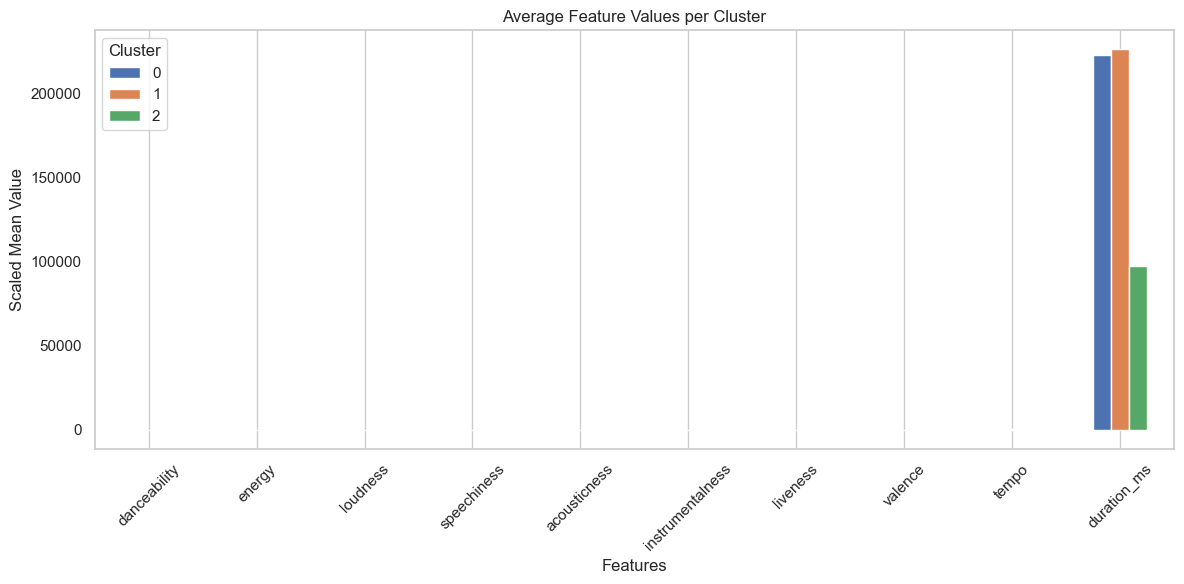

In [43]:
# Optional: Plot radar chart or bar chart per cluster
cluster_profiles.T.plot(kind='bar', figsize=(12,6))
plt.title('Average Feature Values per Cluster')
plt.ylabel('Scaled Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

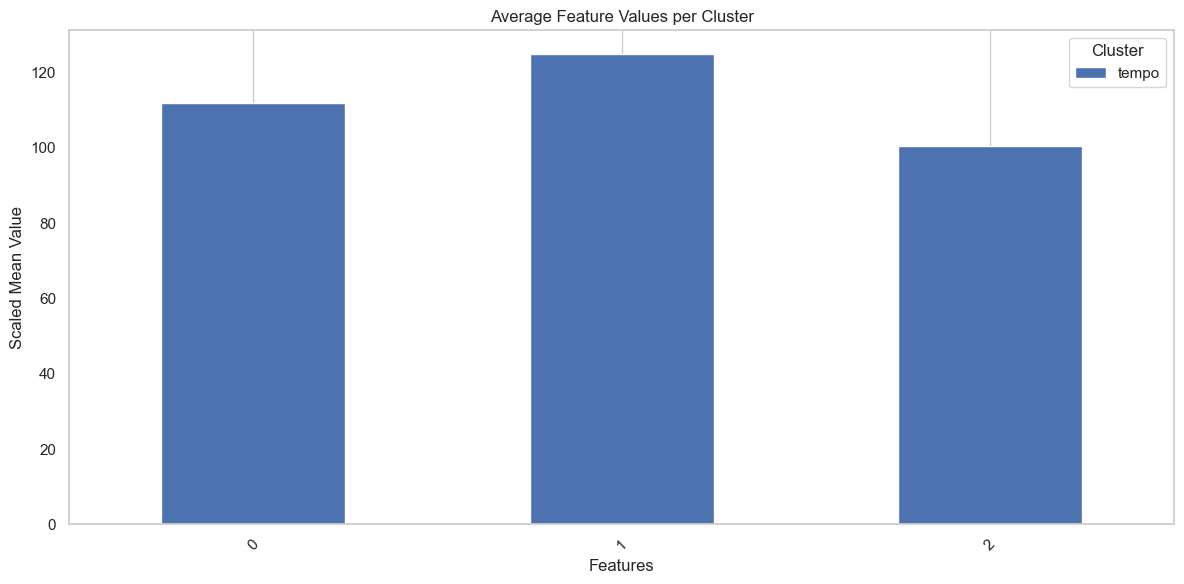

In [44]:
cluster_profiles["tempo"].plot(kind='bar', figsize=(12,6))
plt.title('Average Feature Values per Cluster')
plt.ylabel('Scaled Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

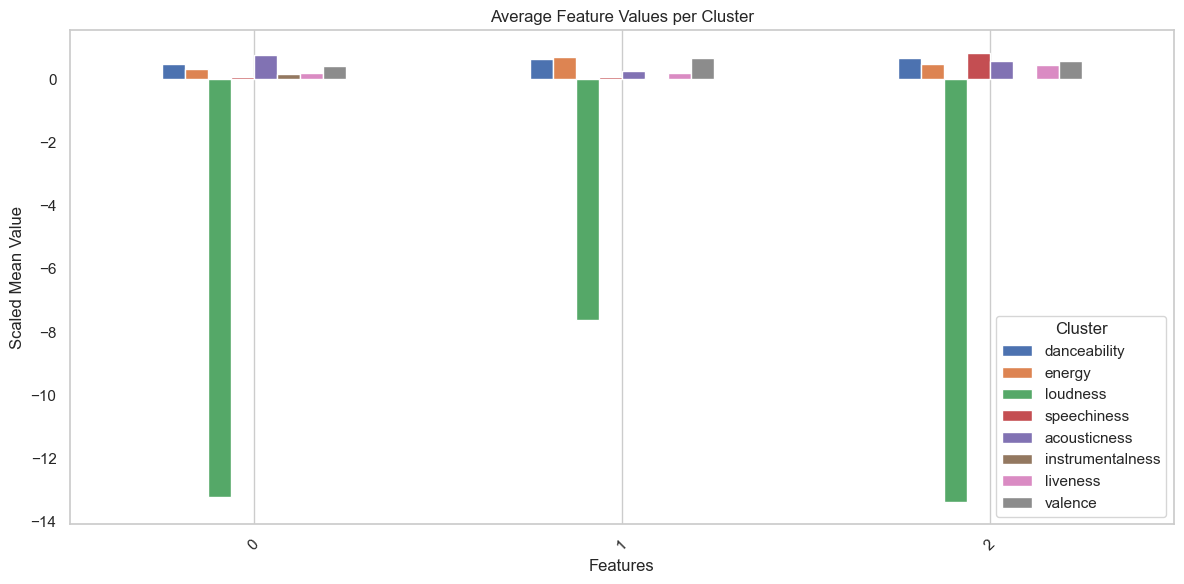

In [45]:
features_to_plot = ['danceability', 'energy', 'loudness', 'speechiness', 
                    'acousticness', 'instrumentalness', 'liveness', 
                    'valence']

cluster_profiles[features_to_plot].plot(kind='bar', figsize=(12,6))
plt.title('Average Feature Values per Cluster')
plt.ylabel('Scaled Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Apply to your clusters

Cluster 0

Instrumentalness = 0.81 (very high)

Acousticness = 0.65 (high)
👉 Means mostly instrumental acoustic songs → Ambient/Instrumental.

Cluster 1

Danceability = 0.63 (high)

Energy = 0.71 (high)

Valence = 0.69 (happy)
👉 Means fun, energetic, happy songs → Pop/Dance/Party.

Cluster 2

Speechiness = 0.83 (very high)

Loudness = -13.38 (not too loud)
👉 Means lots of talking/rap style → Rap/Spoken word.

Cluster 3

Acousticness = 0.70 (high)

Energy = 0.34 (low)

Valence = 0.42 (slightly sad)
👉 Means chill, calm, emotional songs → Chill acoustic / ballads.

### Visualization
➤ 2D Scatter Plot with PCA

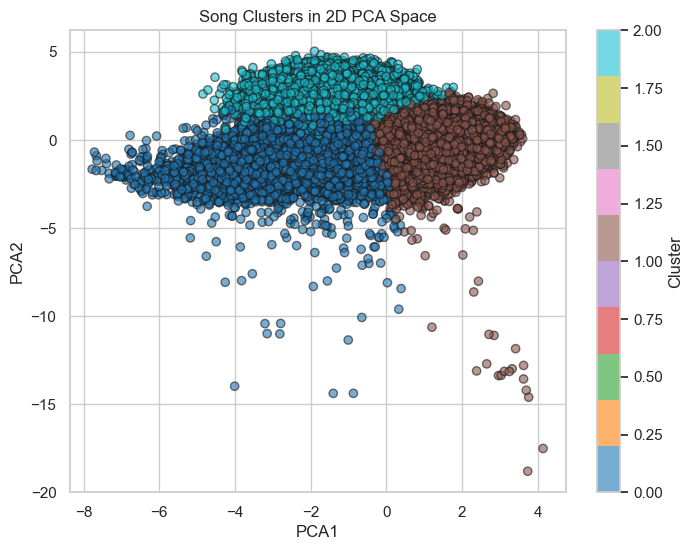

In [46]:
pca = PCA(n_components=2)
df[['pca1', 'pca2']] = pca.fit_transform(X_scaled)

# Step 3: Visualization
plt.figure(figsize=(8,6))
plt.scatter(df['pca1'], df['pca2'], c=df['cluster'], cmap='tab10', alpha=0.6, edgecolor='k')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Song Clusters in 2D PCA Space")
plt.colorbar(label="Cluster")  # adds legend for clusters
plt.show()

In [47]:
df.drop(['pca1', 'pca2'], axis=1, inplace=True)

In [48]:
df.columns

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists', 'cluster'],
      dtype='object')

In [49]:
# df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
# df_pca['cluster'] = cluster_labels


🔹 Why you might skip PCA

If your goal is interpretability (explaining clusters using features like danceability, energy, etc.), then don’t use PCA for clustering.

PCA makes new “PC1, PC2” features, which are hard to explain in real music terms.

Instead, keep clustering on the original features

### Tuneing DBSCAN (Density-Based Spatial Clustering).

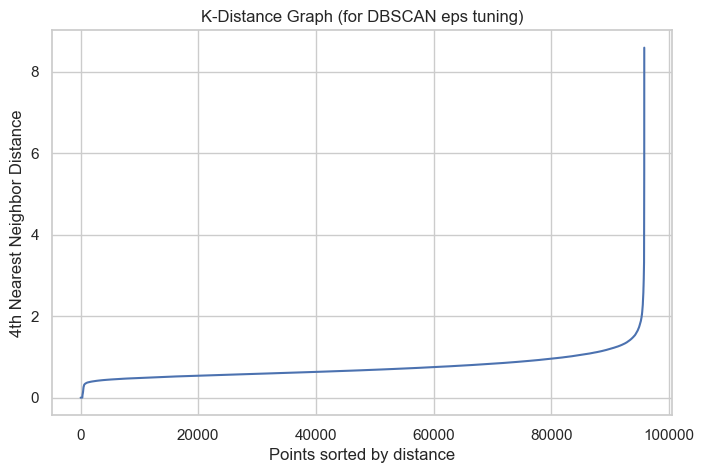

In [50]:
from sklearn.neighbors import NearestNeighbors

# Calculate distance to 4th nearest neighbor (min_samples - 1)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances
distances = np.sort(distances[:, 3], axis=0)  # 4th column

# Plot
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('K-Distance Graph (for DBSCAN eps tuning)')
plt.grid(True)
plt.show()

### Apply DBSCAN

In [51]:
from sklearn.cluster import DBSCAN

# Example parameters — adjust based on your k-distance plot
dbscan = DBSCAN(eps=2.5, min_samples=4)
cluster_labels_dbscan = dbscan.fit_predict(X_scaled)

# Add to DataFrame
df['cluster_dbscan'] = cluster_labels_dbscan

# Check results
n_clusters = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)
n_noise = list(cluster_labels_dbscan).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")
#14m

Estimated number of clusters: 3
Estimated number of noise points: 107


Cluster 0 = 🎉 “High-energy party songs”

Cluster 1 = 🎶 “Calm acoustic songs”

Cluster 2 = 🎤 “Rap/Hip-hop tracks

### Plot Dendrogram (Truncated for Speed)

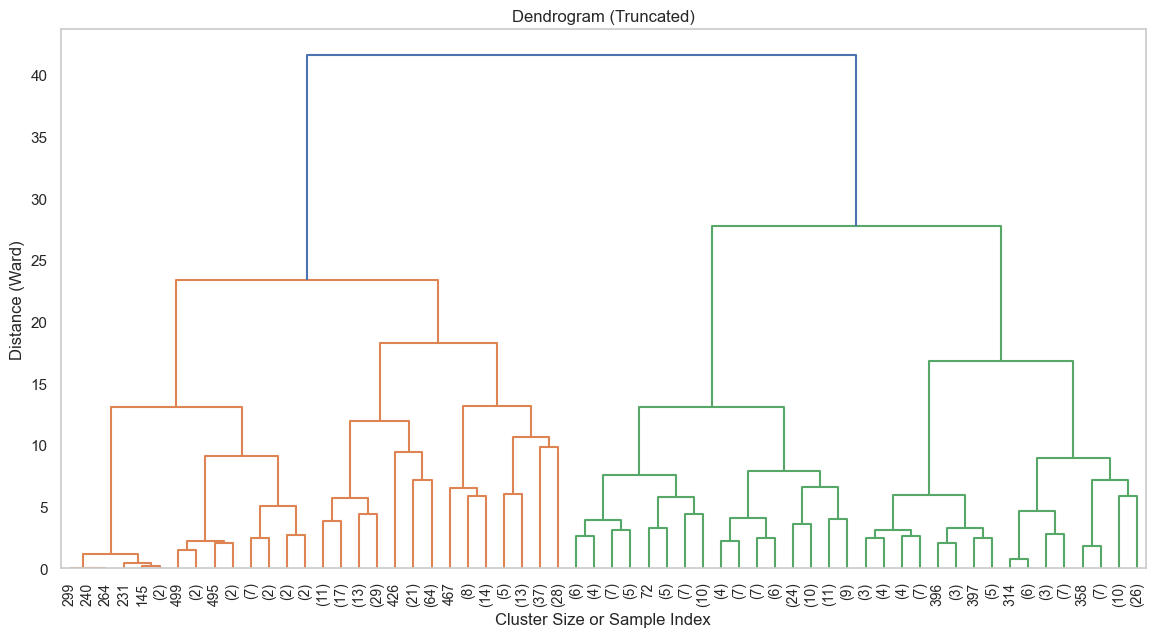

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Use a sample (e.g., first 500 songs) for dendrogram — full dataset is too slow
sample_size = min(500, len(X_scaled))
X_sample = X_scaled[:sample_size]

# Compute linkage
linked = linkage(X_sample, method='ward')  # 'ward' minimizes within-cluster variance

# Plot
plt.figure(figsize=(14, 7))
dendrogram(linked, 
           truncate_mode='level', 
           p=5,  # show last 5 merges
           leaf_rotation=90,
           leaf_font_size=10)
plt.title('Dendrogram (Truncated)')
plt.xlabel('Cluster Size or Sample Index')
plt.ylabel('Distance (Ward)')
plt.grid(False)
plt.show()

### Apply Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Sample 3000 rows for hierarchical clustering
sample_size = 3000
np.random.seed(42)  # for reproducibility
sample_indices = np.random.choice(X_scaled.shape[0], size=sample_size, replace=False)
X_sample = X_scaled[sample_indices]

# ...existing code...
df['cluster_hc'] = np.nan  # initialize with NaN
df.loc[sample_indices, 'cluster_hc'] = cluster_labels_hc  # assign only to sampled rows
# ...existing code...

# Apply clustering on sample
k=4
hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels_hc = hc.fit_predict(X_sample)

# Optional: assign these labels back to full df for sampled rows (if needed)
df_sampled = df.iloc[sample_indices].copy()
df_sampled['cluster_hc'] = cluster_labels_hc

score = silhouette_score(X_sample, cluster_labels_hc)
print(f"✅ Hierarchical clustering applied on {sample_size} samples.")
print(f"✅ Hierarchical ({k} clusters) → Silhouette Score: {score:.4f}")

✅ Hierarchical clustering applied on 3000 samples.
✅ Hierarchical (4 clusters) → Silhouette Score: 0.2160


### Compare All 3 Methods

In [ ]:
from sklearn.metrics import silhouette_score

print("=======================================")
print("📊 CLUSTERING METHOD COMPARISON")
print("=======================================")

sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

mask = cluster_labels_dbscan != -1
if mask.sum() > 1 and len(set(cluster_labels_dbscan[mask])) > 1:
    sil_dbscan = silhouette_score(X_scaled[mask], cluster_labels_dbscan[mask])
    print(f"DBSCAN        → Silhouette Score: {sil_dbscan:.4f}")
else:
    print("DBSCAN        → Not enough clusters")

score = silhouette_score(X_sample, cluster_labels_hc)
print(f"✅ Hierarchical ({k} clusters) → Silhouette Score: {score:.4f}")

📊 CLUSTERING METHOD COMPARISON
Silhouette Score: 0.2424


### Cluster Size Distribution (Optional but Useful)

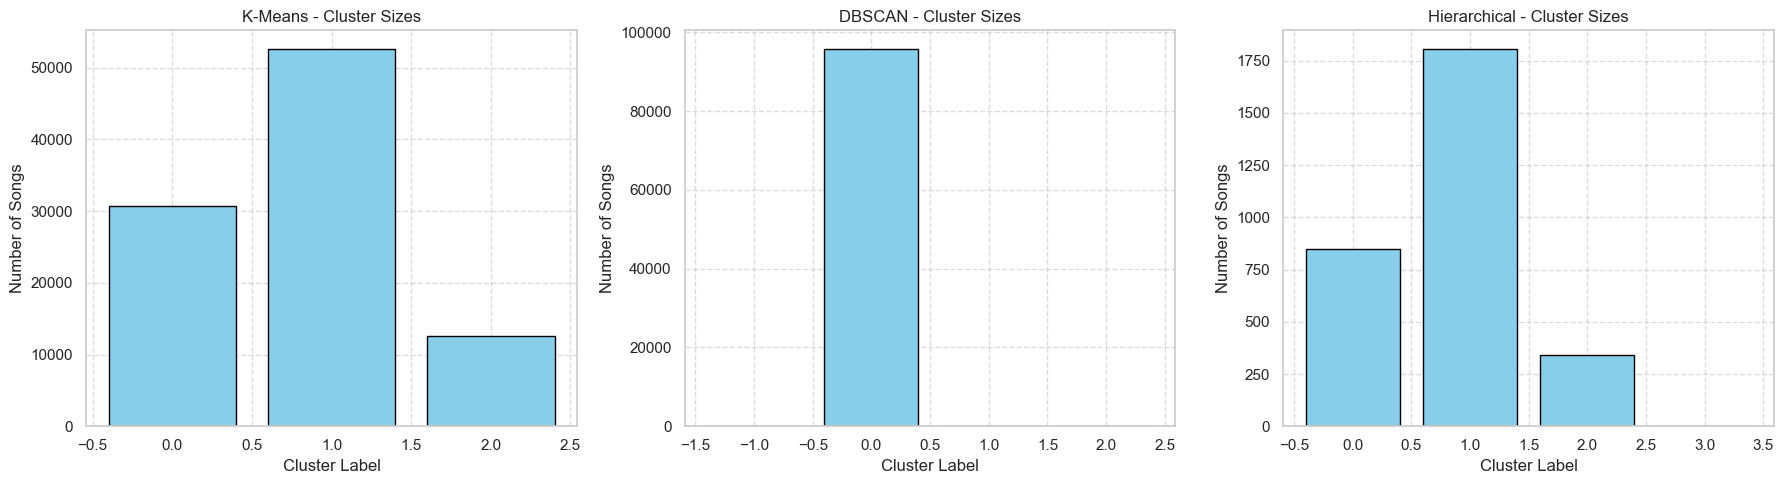

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

methods_labels = [
    ("K-Means", cluster_labels),
    ("DBSCAN", cluster_labels_dbscan),
    ("Hierarchical", cluster_labels_hc)
]

for i, (name, labels) in enumerate(methods_labels):
    unique, counts = np.unique(labels, return_counts=True)
    axes[i].bar(unique, counts, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{name} - Cluster Sizes')
    axes[i].set_xlabel('Cluster Label')
    axes[i].set_ylabel('Number of Songs')
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Final Integration

In [64]:
# ...existing code...
df['cluster_hc'] = np.nan  # initialize with NaN
df.loc[sample_indices, 'cluster_hc'] = cluster_labels_hc  # assign only to sampled rows
# ...existing code...

In [ ]:
# Export

final_output = df[[
    'name_song', 'name_artists', 'genres',
    'danceability', 'energy', 'valence', 'tempo',
    'cluster', 'cluster_dbscan', 'cluster_hc'
]].copy()

final_output.to_csv('amazon_music_clusters_all_methods.csv', index=False)
print("✅ Saved clustering results for all methods.")

✅ Saved clustering results for all methods.
